# Capstone Project:
# Predictions of New Orleans Service Requests Processing Periods
##### Nadia Buksa, July 2022. BrainStation

---
## Business Problem

**Predict the number of days required to resolve a service request.**

---

<center><h1> Part 2 </h1></center>

<center><h3> Exploratory Data Analysis and Data Preparation </h3></center>

<h5>Goal:</h5> 

***Transform data into usable forms for modelling and analysis.***

---

# Table of Contents

1. [Data Dictionary](#Data-Dictionary) <br>
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))<br>
3. [Summary Statistics](#Summary-Statistics)<br>
4. [Data Types](#Data-Types)<br>
5. [Categorical Data](#Categorical-Data)<br>
6. [Summary on Categorical values](#Summary-on-categorical-values:)<br>
7. [Continuous Data](#Continuous-Data)<br>
8. [Data Wrangling](#Data-Wrangling)<br>
9. [Create New Variables](#Create-New-Variables)<br>
10. [Wrangle Categorical values](#Wrangle-categorical-values)<br>
11. [Wrangle Non-Categorical values](#Wrangle-non-categorical-values)<br>
12. [Show end result of dummies](#Show-end-result-of-dummies)<br>

# Data Acquisition

In [210]:
# Import the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Filter warnings
import warnings
warnings.filterwarnings('ignore')


In [211]:
# Load the data and to ensure that I have no mixed data types set low_memory - False

df = pd.read_csv('end_of_part_one.csv', low_memory=False)

In [212]:
# Create a backup and review the data

backup = df.copy()
df.head()

,id,year,dist,agency,type,date_requested,status,date_closed,tags,date_modified,reason,address,lat,lon,processing_period_days
0,2019-631621,2019,unknown,unknown,unknown,2019-11-06,Pending,NaN,unknown,2019-11-06,unknown,unknown,0.000000,0.000000,NaN
1,2021-830021,2021,B,Safety and Permits,COVID-19,2021-10-05,Pending,NaN,Pending,2021-10-05,COVID-19 Business Non-Compliance,823 Fulton St,29.943975,-90.065412,NaN
2,2021-821555,2021,D,Department of Sanitation,Trash/Recycling,2021-09-15,Closed,2021-12-15,Resolved,2021-12-15,Missed Trash Pick-Up,1672 Rousselin Dr,29.979937,-90.073291,91.0
3,2021-821553,2021,D,Department of Sanitation,Trash/Recycling,2021-09-15,Closed,2021-12-15,Resolved,2021-12-15,Missed Trash Pick-Up,1334 Bartholomew St,29.968404,-90.034680,91.0
4,2021-821552,2021,D,Department of Sanitation,Trash/Recycling,2021-09-15,Closed,2021-12-15,Resolved,2021-12-15,Missed Trash Pick-Up,1564 N Prieur St,29.974061,-90.068478,91.0


In [213]:
# Show columns to creat Data Dictionary
df.columns

Index(['id', 'year', 'dist', 'agency', 'type', 'date_requested', 'status',
       'date_closed', 'tags', 'date_modified', 'reason', 'address', 'lat',
       'lon', 'processing_period_days'],
      dtype='object')

# Data Dictionary 
|**Column Name**| **Description**|
|---------------|-----------------------------------------------------------------------------------------------|
|`id`           | Unique ID Number that is assigned to each case. This column has no missing values, and no duplicates.|
|`year`         | Year when a request was created.                                                               |
|`dist`         | Council District that serviced address belongs to.                                             |
|`agency`       | Specifies which Agency a request is allocated to. Some requests are being Referred / Outsourced.|
|`type`         | When filing a request, customers are to specify one of the twelve request types.                   |
|`date_requested`| Date when a service request was created.                                                    |
|`status`       | Analogus to Request Status and has a few additional categories to it (ex. 'Referred').         |
|`date_closed`  | Date when a service request was created.                                                       |
|`tags`         | A descriptive field that provides additional information about service requests.               |
|`date_modified`| Date and time when a request was last worked on / updated.                                     |
|`reason`       | A short text field, perhaps to provide additional details about a request. These may be internal notes because the online request form offers no opportunity to fill out this field as a user.                                 |
|`address`      | Address where service is required.                                                             |
|`lat`          | Longitude of the address where service is required.                                            |
|`lon`          | Latitude of the address where service is required.                                             |
|`processing_period_days`  | Number of days between the date what a case was created and when the case was closed.  |
|`month`        | Month when a request was created.                                                              |
|`weekday`      | Weekday when a request was created.                                                            |

# Exploratory Data Analysis (EDA)

## Summary Statistics

In [214]:
# Show data metrics

print("The new dataset contains:")
print(f"{df.shape[0]} rows and {df.shape[1]} columns.")
print(f"{df.isna().sum().sum()} null values, that is {round(df.isna().sum().sum()/(df.isna().sum().sum()+df.notnull().sum().sum())*100, )}% of all dataset cels (not rows)")
print(f"{df.duplicated().sum()} duplicated rows")

The new dataset contains:
579704 rows and 15 columns.
150886 null values, that is 2% of all dataset cels (not rows)
0 duplicated rows


In [215]:
# Show % of missing values and where they are

na_table = df.isna().mean().mul(100).round(2)
na_table[na_table > 0]

date_closed               13.01
processing_period_days    13.01
dtype: float64

## Data Types

In [216]:
# Check data types

df.dtypes

id                         object
year                        int64
dist                       object
agency                     object
type                       object
date_requested             object
status                     object
date_closed                object
tags                       object
date_modified              object
reason                     object
address                    object
lat                       float64
lon                       float64
processing_period_days    float64
dtype: object

In [217]:
df.dtypes.value_counts()

object     11
float64     3
int64       1
dtype: int64

**Observation**<br> 
I will have to convert data fields to datetime format once again.<br>
There are 11 categorical columns that will have to be transformed into numeric when possible or makes sense.

In [218]:
# Convert date variables into datetime format

df['date_requested'] = pd.to_datetime(df['date_requested'], format='%Y/%m/%d')

df['date_modified'] = pd.to_datetime(df['date_modified'], format='%Y/%m/%d')

df['date_closed'] = pd.to_datetime(df['date_closed'], format='%Y/%m/%d')

## Categorical Data

In [219]:
# Check categorical variables

df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579704 entries, 0 to 579703
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       579704 non-null  object
 1   dist     579704 non-null  object
 2   agency   579704 non-null  object
 3   type     579704 non-null  object
 4   status   579704 non-null  object
 5   tags     579704 non-null  object
 6   reason   579704 non-null  object
 7   address  579704 non-null  object
dtypes: object(8)
memory usage: 35.4+ MB


In [220]:
# Function to summarise all the categorical variables in a dataframe
def show_categorical(df):
    category_features = df.select_dtypes(include=['object', 'bool']).columns.values
    print(f'There are {len(category_features)} category features in this dataset.')
    print(f'category features are: {category_features}')
    display(df.select_dtypes(include='object').head(3))

In [221]:
show_categorical(df)

There are 8 category features in this dataset.
category features are: ['id' 'dist' 'agency' 'type' 'status' 'tags' 'reason' 'address']


,id,dist,agency,type,status,tags,reason,address
0,2019-631621,unknown,unknown,unknown,Pending,unknown,unknown,unknown
1,2021-830021,B,Safety and Permits,COVID-19,Pending,Pending,COVID-19 Business Non-Compliance,823 Fulton St
2,2021-821555,D,Department of Sanitation,Trash/Recycling,Closed,Resolved,Missed Trash Pick-Up,1672 Rousselin Dr


In [222]:
# Create a function that I will be using throughout this report to explore categorical features

def explore_categorical(col_name, df): 
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print()
        print(f"\033[1m\033[94m{col_name} \n{20 * '-'}\033[0m") 
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        print()
        print(df[col_name].value_counts(normalize=True))
        sns.countplot(y=col_name, data=df, order = df[col_name].value_counts().index, color="royalblue")
        print()

**<center> `id` </center>**

In [223]:
# We already know there are no missing values in this category

# Confirm that there are no duplicate values in 'id'

df['id'].is_unique

True

**<center> `dist` </center>**


dist 
--------------------
Feature 'dist' has 6 unique categories

B          0.220835
D          0.219821
A          0.216369
C          0.159554
E          0.139821
unknown    0.043600
Name: dist, dtype: float64



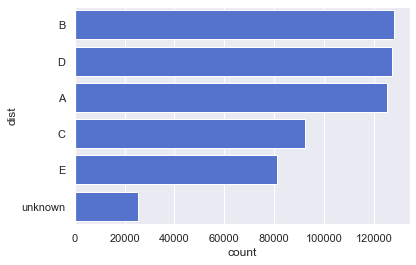

In [224]:
explore_categorical('dist', df)

In [225]:
# How many unknown values are the in 'dist' variable?

print(f"There are {len(df[df['dist'] == 'unknown'])} unknown values in variable `dist`.")
print(f"{round(len(df[df['dist'] == 'unknown'])/df.shape[0]*100,2)}% of `dist` records are unknown")

There are 25275 unknown values in variable `dist`.
4.36% of `dist` records are unknown


**<center> `agency` </center>**


agency 
--------------------
Feature 'agency' has 22 unique categories

Department of Sanitation                                            0.403168
Department of Public Works                                          0.360256
Department of Code Enforcement                                      0.127236
Department of Parks & Parkway                                       0.037847
Bureau of Revenue                                                   0.019174
Safety and Permits                                                  0.018879
Mosquito, Termite & Rodent Control Board                            0.015567
unknown                                                             0.011225
Health Department                                                   0.002387
Executive Office of the Mayor                                       0.001239
Ground Transportation Bureau                                        0.000961
Emergency Medical Services                                          0.000871
Bur

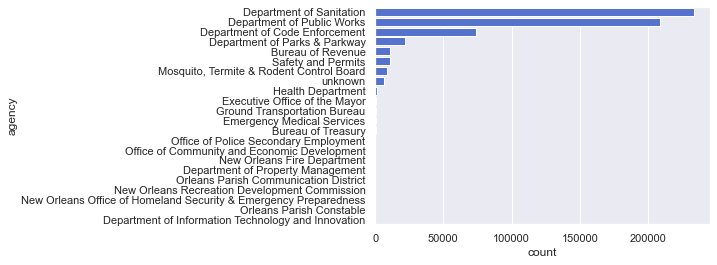

In [226]:
explore_categorical('agency', df)

In [227]:
# Looking at the number of values in each category, it makes sense to combine categories that have less than 100 records

# Next step - condense categories with 100 > data points into one category, and combine it with the existing 'unknown' category

# I THINK I COULD USE RENAME HERE INSTEAD TO KEEP IT TIDIER

df['agency'] = df['agency'].map({
            'Department of Sanitation' : 'Department of Sanitation',
            'Department of Public Works' : 'Department of Public Works',
            'Department of Code Enforcement' : 'Department of Code Enforcement',
            'Department of Parks & Parkway' : 'Department of Parks & Parkway',
            'Bureau of Revenue' : 'Bureau of Revenue',
            'Safety and Permits' : 'Safety and Permits',
            'Mosquito, Termite & Rodent Control Board' : 'Mosquito, Termite & Rodent Control Board',
            'unknown' : 'other/unknown',
            'Health Department' : 'Health Department',
            'Executive Office of the Mayor' : 'Executive Office of the Mayor',
            'Ground Transportation Bureau' : 'Ground Transportation Bureau',
            'Emergency Medical Services' : 'Emergency Medical Services',
            'Bureau of Treasury' : 'Bureau of Treasury',
            'Office of Police Secondary Employment' : 'Office of Police Secondary Employment',
            'Office of Community and Economic Development' : 'other/unknown',
            'New Orleans Fire Department' : 'other/unknown',
            'Department of Property Management' : 'other/unknown',
            'Orleans Parish Communication District' : 'other/unknown',
            'New Orleans Recreation Development Commission' : 'other/unknown',
            'New Orleans Office of Homeland Security & Emergency Preparedness' : 'other/unknown',
            'Orleans Parish Constable' : 'other/unknown',
            'Department of Information Technology and Innovation' : 'other/unknown'
})


In [228]:
# How many categories left?

len(df['agency'].value_counts())

14

In [229]:
# Check the new set of 'agency' categories

df['agency'].value_counts()

Department of Sanitation                    233718
Department of Public Works                  208842
Department of Code Enforcement               73759
Department of Parks & Parkway                21940
Bureau of Revenue                            11115
Safety and Permits                           10944
Mosquito, Termite & Rodent Control Board      9024
other/unknown                                 6605
Health Department                             1384
Executive Office of the Mayor                  718
Ground Transportation Bureau                   557
Emergency Medical Services                     505
Bureau of Treasury                             449
Office of Police Secondary Employment          144
Name: agency, dtype: int64

In [230]:
print(f"There are {len(df[df['agency'] == 'other/unknown'])} other or unknown values in variable `agency`.")
print(f"{round(len(df[df['agency'] == 'other/unknown'])/df.shape[0]*100,2)}% of `agency` records are other/unknown")

There are 6605 other or unknown values in variable `agency`.
1.14% of `agency` records are other/unknown


In [231]:
mask = df.agency.isin(['Department of Sanitation',
                       'Department of Public Works',
                       'Department of Code Enforcement',
                       'Department of Parks & Parkway',
                       'Safety and Permits',
                       'Bureau of Revenue',
                       'Mosquito, Termite & Rodent Control Board',
                       'other/unknown',
                       'Health Department',
                       'Executive Office of the Mayor',
                       'Ground Transportation Bureau',
                       'Emergency Medical Services',
                       'Bureau of Treasury',
                       'Office of Police Secondary Employment',])

In [232]:
df[mask].groupby("agency").processing_period_days.agg(["mean", "std"])

,mean,std
agency,,
Bureau of Revenue,97.040594,251.322663
Bureau of Treasury,68.497768,123.185043
Department of Code Enforcement,44.302888,118.074120
Department of Parks & Parkway,170.645723,216.106016
Department of Public Works,317.506113,594.317161
Department of Sanitation,53.097094,81.689779
Emergency Medical Services,79.984962,101.777246
Executive Office of the Mayor,88.516693,116.914274
Ground Transportation Bureau,185.191321,143.067333


In [233]:
'Bureau of Revenue',
'Bureau of Treasury',
'Department of Code Enforcement',
'Department of Parks & Parkway',
'Department of Public Works',
'Department of Sanitation',
'Emergency Medical Services',
'Executive Office of the Mayor',
'Ground Transportation Bureau',
'Health Department',
'Mosquito, Termite & Rodent Control Board',
'Office of Police Secondary Employment',
'Safety and Permits',
'other/unknown'

'other/unknown'

Text(0.5, 6.799999999999976, 'Processing period in days')

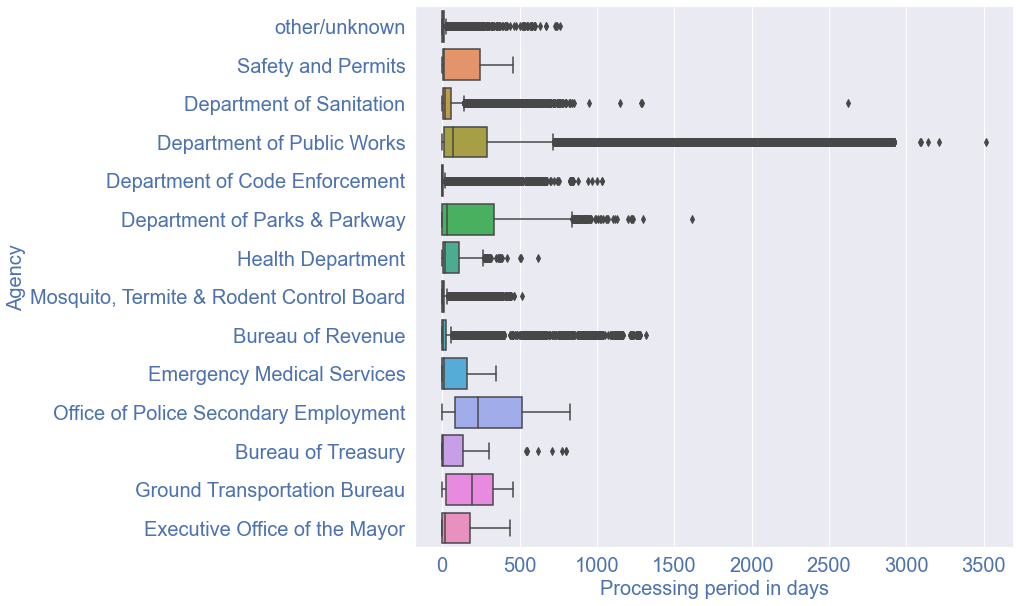

In [342]:
g = sns.catplot(
    x = "processing_period_days",
    y = "agency", 
    data=df[mask],
    kind="box",
    orient = 'h',
    height=8.27,
    aspect=20/14)#.set(title='Distribution of processing periods by length')
plt.yticks(fontsize = (20), color = 'b',)
plt.ylabel('Agency', fontsize = (20), color = 'b')
plt.xticks(fontsize = (20), color = 'b')
plt.xlabel('Processing period in days', fontsize = (20), color = 'b')
#plt.savefig("outliers_by_agency.png", dpi=300)

**Observation:** From the graph above, we can conclude that Department of Public Works is the main source of our outliers. Office of Police Secondary Employment, and Ground Transportation Bureau are the most normally distributed agencies. <br>

Text(0, 0.5, 'Agency')

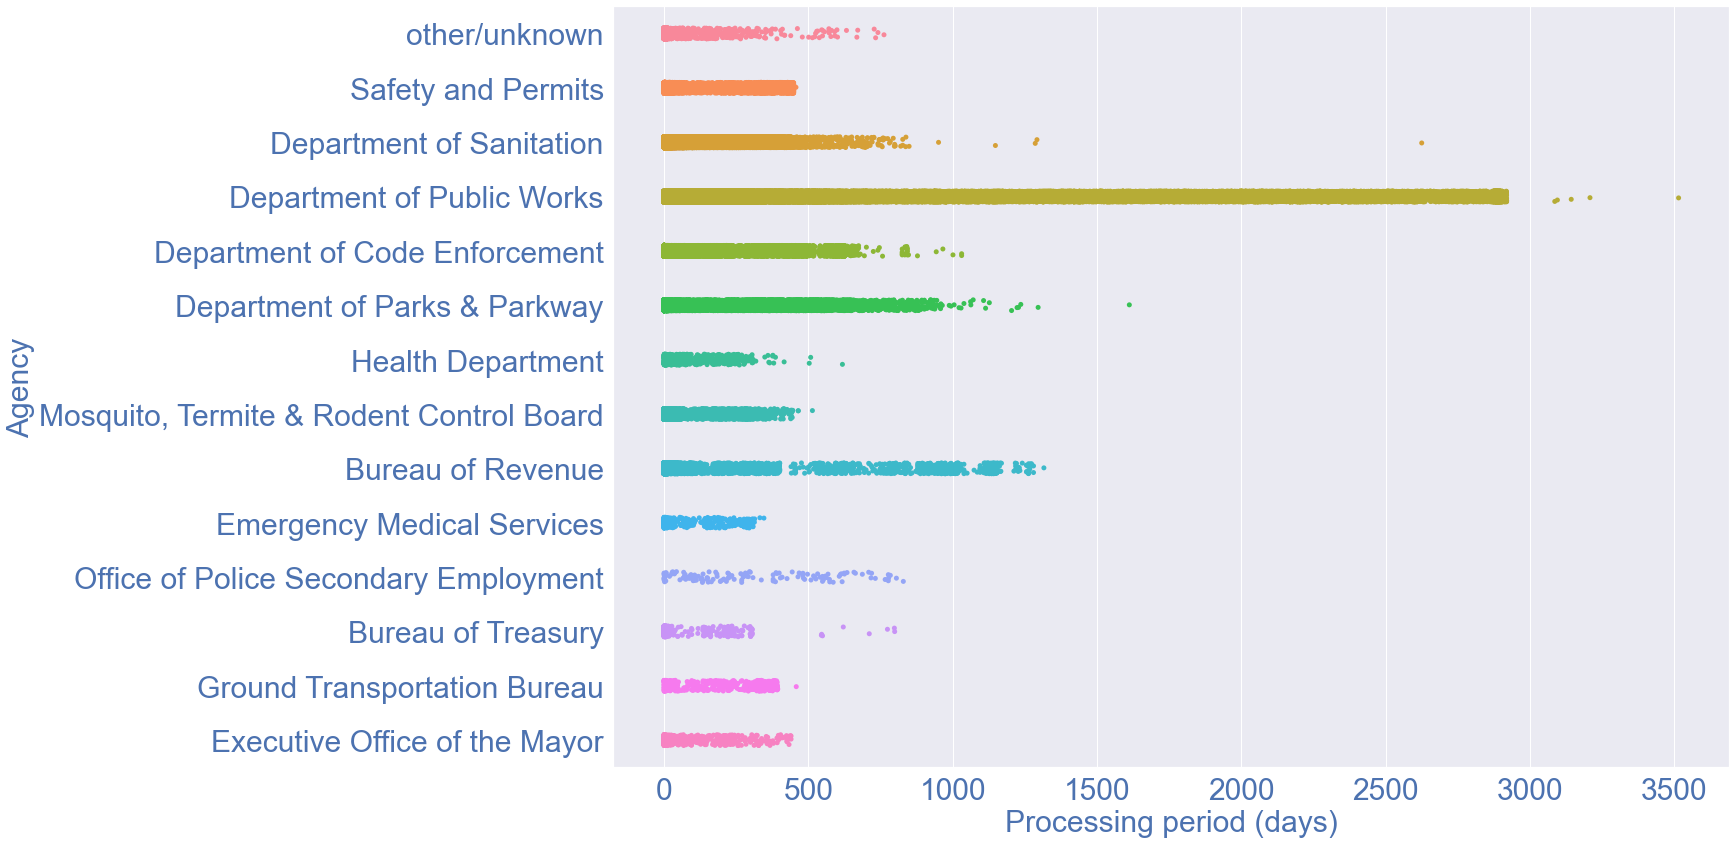

In [337]:
plt.figure(figsize=(20,14))
sns.stripplot(y = 'agency',
              x = 'processing_period_days',
              orient = 'h',
              data = df)#.set(title = 'Distribution of processing_period days by agency')
plt.xticks(fontsize = (30), color = 'b',)
plt.xlabel('Processing period (days)', fontsize = (30), color = 'b',)
plt.yticks(fontsize = (30), color = 'b',)
plt.ylabel('Agency', fontsize = (30), color = 'b',)
#plt.savefig("processing_period_length_by_agency.png", dpi=300)

**Observations:**<br>
Expectedly, Department of Public Works requires the most amount of time (the longest processing periods). It is expected based on the previous visual where we discovered that this Agency has the most number of outliers in terms of processing period length.<br>

Text(0, 0.5, 'Agency')

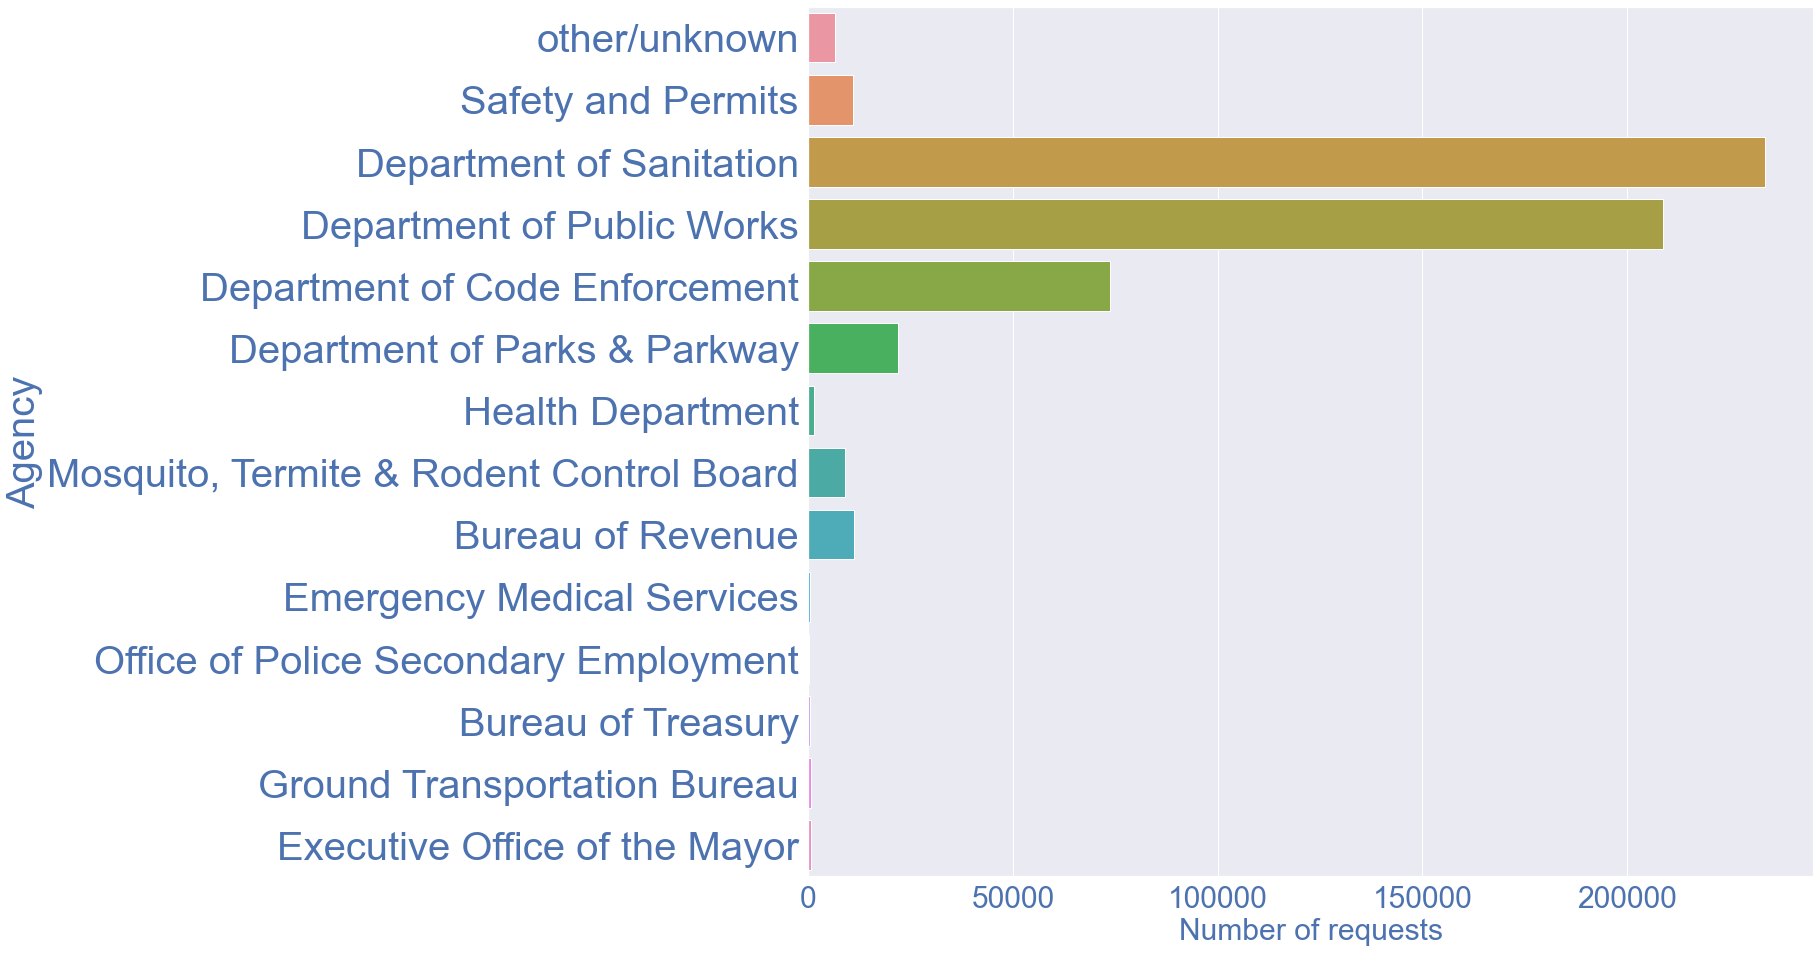

In [340]:
plt.figure(figsize = (18,16))
sns.countplot(y = 'agency',
              orient = 'h',
              data = df)#.set(title = 'Distribution of requests by Agency')
plt.xticks(fontsize = (30), color = 'b',)
plt.xlabel('Number of requests', fontsize = (30), color = 'b')
plt.yticks(fontsize = (40), color = 'b')
plt.ylabel('Agency', fontsize = (40), color = 'b')
#fig.savefig("number_of_requests_by_agency.png", dpi=300)

**Observations:**
Distribution of requests by agency provides some clarity on the exceptional number of outliers and extended processing periods for certain agencies. Perhaps the Department of Public Works is overloaded or shortstaffed. I would recommend looking into this department's challenges.<br>
It is remarkable that the Department of Sanitation has the most number of requests and yet they are do not have many outliers compared to other agencies. 


**Next Steps:**<br>
Lastly, I would like to check how well organised or chaotic the request allocations are to a responsible agency based on the request type.

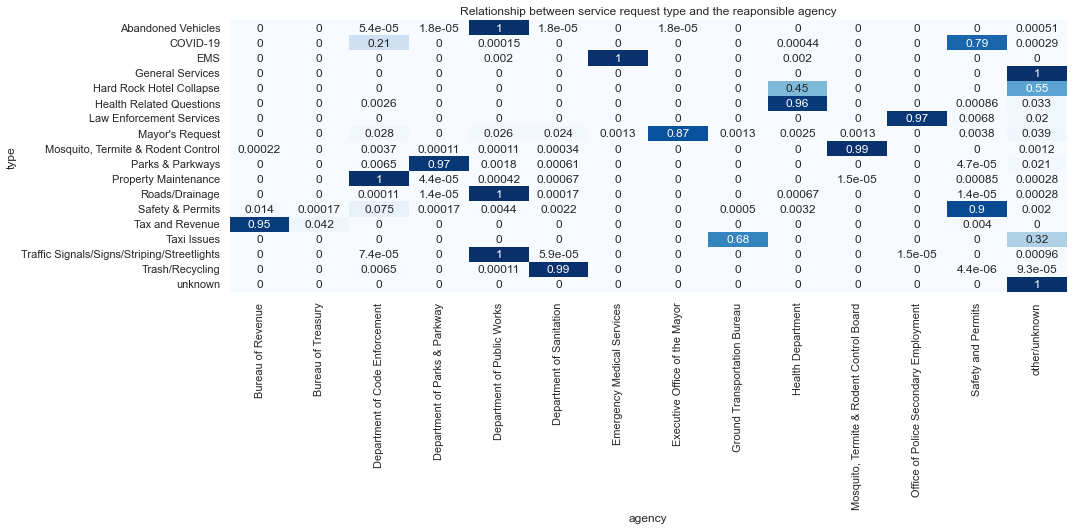

In [184]:
a=df['type']
b=df['agency']
plt.figure(figsize=(15,5))
sns.heatmap(pd.crosstab(a,b,normalize='index'),
            cmap="Blues", annot=True, cbar=False).set(title = 'Relationship between service request type and the reaponsible agency');

**Observation:**<br>
Very few request types get allocated to a non-typical agency. There is strong correlation between request types and responsible agencies. I will keep that in mind when selecing independent variables for predicting models.

**<center> `type` </center>**


type 
--------------------
Feature 'type' has 18 unique categories

Trash/Recycling                                0.405579
Roads/Drainage                                 0.132649
Traffic Signals/Signs/Striping/Streetlights    0.129637
Property Maintenance                           0.121364
Abandoned Vehicles                             0.098067
Parks & Parkways                               0.039208
Tax and Revenue                                0.019870
Mosquito, Termite & Rodent Control             0.015651
COVID-19                                       0.011942
Safety & Permits                               0.010288
General Services                               0.006379
unknown                                        0.003031
Health Related Questions                       0.002287
Mayor's Request                                0.001411
Taxi Issues                                    0.001406
EMS                                            0.000873
Law Enforcement Services           

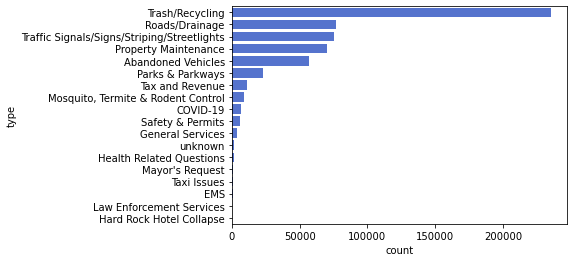

In [23]:
explore_categorical('type', df)

In [24]:
# How many unknown values are the in 'type' variable?

print(f"There are {len(df[df['type'] == 'unknown'])} unknown values in variable `type`.")
print(f"{round(len(df[df['type'] == 'unknown'])/df.shape[0]*100,2)}% of `type` records are unknown")

There are 1757 unknown values in variable `type`.
0.3% of `type` records are unknown


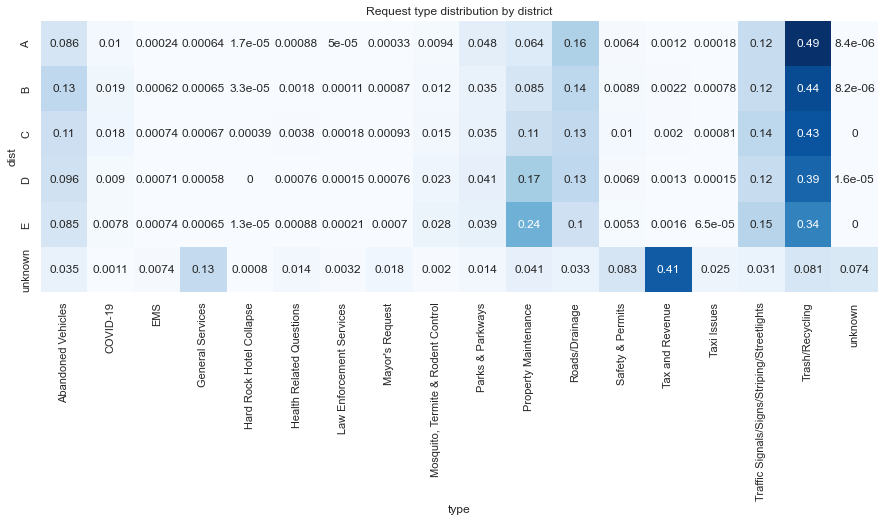

In [183]:
a=df['dist']
b=df['type']
plt.figure(figsize=(15,5))
sns.heatmap(pd.crosstab(a,b,normalize='index'),
            cmap="Blues", annot=True, cbar=False).set(title = 'Request type distribution by district');


**Observations:**<br>
- The most frequently requested service type across all districts is Trash/Recycling
- District A is most frequently requesting Trash/Recycling services
- Most of Tax and Revenue service requests are missing district and possibly address
- Districts D and E request Property Maintenance more than others

**<center> `status` </center>**


status 
--------------------
Feature 'status' has 2 unique categories

Closed     0.869859
Pending    0.130141
Name: status, dtype: float64



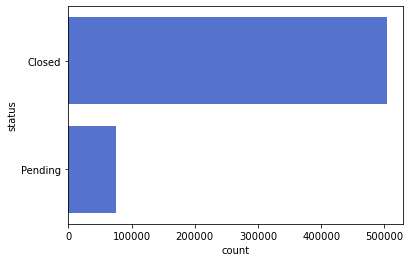

In [26]:
explore_categorical('status', df)

In [27]:
print(f"{round(len(df[df['status'] == 'Pending'])/len(df['status'])*100,1)}% of all cases are Pending. Note that Pending cases \
are expected to have null values in 'Date_closed' and 'processing_period_days'.")

13.0% of all cases are Pending. Note that Pending cases are expected to have null values in 'Date_closed' and 'processing_period_days'.


**<center> `tags` </center>**


tags 
--------------------
Feature 'tags' has 38 unique categories

Case Resolved                                    0.401010
unknown                                          0.380736
Resolved                                         0.086142
Pending                                          0.047731
Case is Invalid                                  0.037733
Assigned to Contractor                           0.016871
Inspected                                        0.010059
Duplicate Case                                   0.007064
Referred to Code Enforcement                     0.003288
Invalid Case                                     0.003105
Referred to External Agency                      0.002329
Reviewed                                         0.001770
Duplicate Request                                0.000474
Unfounded                                        0.000235
Referred to Property Owner                       0.000217
Not Enough Information- Resubmittal Required     0.000214
Cap

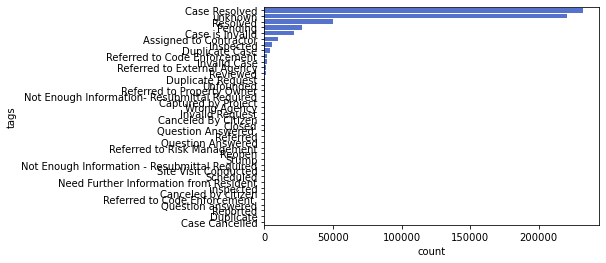

In [28]:
explore_categorical('tags', df)

**Remove records with the folllowing tags:**

- 'Case Cancelled'
- 'Canceled by citizen'
- 'Canceled By Citizen'
- 'Duplicate'
- 'Duplicate Case'
- 'Duplicate Request'
- 'Unfounded'
- 'Invalid Case'
- 'Invalid Request'
- 'Case is Invalid'
- 'Not Enough Information- Resubmittal Required'
- 'Not Enough Information - Resubmittal Required'
- 'Need Further Information from Resident'

Those are the requests that did not result in services rendered. Therefore, these records are not valid, and may cause noise.    

In [29]:
df['tags'].isna().sum()

0

In [30]:
df['tags'].replace({
                    'Case Cancelled' : 'TO_DROP',
                    'Canceled by citizen' : 'TO_DROP',
                    'Canceled By Citizen' : 'TO_DROP',
                    'Duplicate' : 'TO_DROP',
                    'Duplicate Case' : 'TO_DROP',
                    'Duplicate Request' : 'TO_DROP',
                    'Unfounded' : 'TO_DROP',
                    'Invalid Case' : 'TO_DROP',
                    'Invalid Request' : 'TO_DROP',
                    'Case is Invalid' : 'TO_DROP',
                    'Not Enough Information- Resubmittal Required' : 'TO_DROP',
                    'Not Enough Information - Resubmittal Required' : 'TO_DROP',
                    'Need Further Information from Resident' : 'TO_DROP',
                    'Case Resolved' : 'Resolved',
                    'Referred to Code Enforcement' : 'Referred',
                    'Referred to External Agency' : 'Referred',
                    'Referred to Property Owner' : 'Referred',
                    'Closed' : 'Resolved',
                    'Question Answered.' : 'Question Answered',
                    'Referred to Risk Management' : 'Referred',
                    'Site Visit Conducted' : 'Site Visit Conducted',
                    'inspected' : 'Inspected',
                    'Referred to Code Enforcement' : 'Referred',
                    'Question answered' : 'Question Answered'
}, inplace = True)

In [31]:
print(f"{df[df['tags'] == 'TO_DROP'].shape[0]} \
or {round(df[df['tags'] == 'TO_DROP'].shape[0]/df.shape[0]*100)}% \
of all records are marked as 'invalid', 'duplicate', or 'cancelled'.")

28452 or 5% of all records are marked as 'invalid', 'duplicate', or 'cancelled'.


**Remove invalid, duplicate, and cancelled requests**

In [32]:
# Save those records that are to be removed

tags_to_drop = df[df['tags'] == 'TO_DROP'].index

# Remove prepared records

df.drop(index=tags_to_drop, inplace=True)

In [33]:
df['tags'].value_counts()

Resolved                         282455
unknown                          220714
Pending                           27670
Assigned to Contractor             9780
Inspected                          5834
Referred                           3439
Reviewed                           1026
Captured by Project                 112
Wrong Agency                         83
Question Answered                    74
Reopen                               25
Stump                                15
Site Visit Conducted                 14
Scheduled                             9
Reported                              1
Referred to Code Enforcement          1
Name: tags, dtype: int64

**Combine the following tags under one 'other'**

These tags contain only few data points, so they're not worth keeping separately:

|<center> `tags` </center>    |Number of data points|
|-----------------------------|---------------------|
|Captured by Project          |112 data points      |
|Wrong Agency                 |83 data points       |
|Question Answered            |74 data points       |
|Reopen                       |25 data points       |
|Stump                        |15 data points       |
|Site Visit Conducted         |14 data points       |
|Scheduled                    |9 data points        |
|Reported                     |1 data points        |

Compress the bottom 8 categories into one 'other', as they hold very few data points.

In [97]:
df['tags'].replace({
                    'Captured by Project' : 'other',
                    'Wrong Agency' : 'other',
                    'Question Answered' : 'other',
                    'Reopen' : 'other',
                    'Stump' : 'other',
                    'Site Visit Conducted' : 'other',
                    'Scheduled' : 'other',
                    'Reported' : 'other',
                    'Referred to Code Enforcement' : 'Referred',
                    'Referred to Code Enforcement' : 'Referred'
                    }, inplace = True)

In [98]:
# Final check
df['tags'].value_counts(dropna = False)

Resolved                         282455
unknown                          220714
Pending                           27670
Assigned to Contractor             9780
Inspected                          5834
Referred                           3439
Reviewed                           1026
other                               333
Referred to Code Enforcement          1
Name: tags, dtype: int64

In [99]:
df['tags'].isna().sum()

0


tags 
--------------------
Feature 'tags' has 9 unique categories

Resolved                         0.512388
unknown                          0.400387
Pending                          0.050195
Assigned to Contractor           0.017741
Inspected                        0.010583
Referred                         0.006239
Reviewed                         0.001861
other                            0.000604
Referred to Code Enforcement     0.000002
Name: tags, dtype: float64



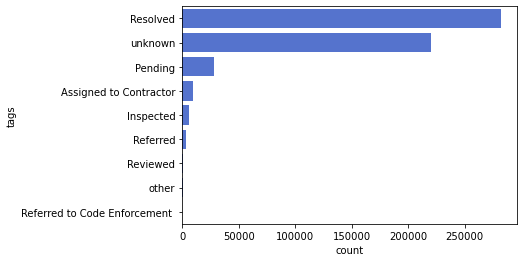

In [100]:
explore_categorical('tags', df)

In [38]:
print(f"There are {len(df[df['tags'] == 'other'])} 'other' values in variable `tags`.")
print(f"{round(len(df[df['tags'] == 'other'])/df.shape[0]*100,2)}% of `tags` records are other")

There are 333 'other' values in variable `tags`.
0.06% of `tags` records are other


**<center> `reason` </center>**

In [273]:
# Show how many categories records are in variable 'reason'?

print(f"There are {len(df['reason'].value_counts())} unique requests. \
This field may be useful for my second business problem.")

There are 121 unique requests. This field may be useful for my second business problem.


**<center> `address` </center>**

In [40]:
print(f"There are {len(df['address'].value_counts())} addresses that made at least one request since 2012.")
print(f"There are {len(df[df['address'] == 'unknown'])} more requests that are missing address or is unknown")
print(f"{round(len(df[df['address'] == 'unknown'])/df.shape[0]*100)}% of all requests in the dataframe are missing the address")

There are 255633 addresses that made at least one request since 2012.
There are 11574 more requests that are missing address or is unknown
2% of all requests in the dataframe are missing the address


## Summary on categorical values:

In [102]:
print(f"'DIST' has {len(df['dist'].value_counts())} unique categories.")
print(f"There are {len(df[df['dist'] == 'unknown'])} unknown values in variable `dist`.")
print(f"{round(len(df[df['dist'] == 'unknown'])/df.shape[0]*100,2)}% of `dist` records are unknown.")
print()
print(f"'AGENCY' has {len(df['agency'].value_counts())} unique categories.")
print(f"There are {len(df[df['agency'] == 'other/unknown'])} other or unknown values in variable `agency`.")
print(f"{round(len(df[df['agency'] == 'other/unknown'])/df.shape[0]*100,2)}% of `agency` records are other/unknown.")
print()
print(f"'TYPE' has {len(df['type'].value_counts())} unique categories.")
print(f"There are {len(df[df['type'] == 'unknown'])} unknown values in variable `type`.")
print(f"{round(len(df[df['type'] == 'unknown'])/df.shape[0]*100,2)}% of `type` records are unknown.")
print()
print(f"'TAGS' has {len(df['tags'].value_counts())} unique categories.")
print(f"There are {len(df[df['tags'] == 'other'])} 'other' values in variable `tags`.")
print(f"{round(len(df[df['tags'] == 'other'])/df.shape[0]*100,2)}% of `tags` records are other.")
print()
print(f"'REASON' has {len(df['reason'].value_counts())} unique requests.")
print()
print(f"There are {len(df['address'].value_counts())} addresses that made at least one request since 2012.")
print(f"Additionally, there are {len(df[df['address'] == 'unknown'])} more requests, but they are missing address or the address is unknown.")
print(f"{round(len(df[df['address'] == 'unknown'])/df.shape[0]*100)}% of all requests in the dataframe are missing addresses.")

'DIST' has 6 unique categories.
There are 23825 unknown values in variable `dist`.
4.32% of `dist` records are unknown.

'AGENCY' has 14 unique categories.
There are 6078 other or unknown values in variable `agency`.
1.1% of `agency` records are other/unknown.

'TYPE' has 18 unique categories.
There are 1757 unknown values in variable `type`.
0.32% of `type` records are unknown.

'TAGS' has 9 unique categories.
There are 333 'other' values in variable `tags`.
0.06% of `tags` records are other.

'REASON' has 121 unique requests.

There are 255633 addresses that made at least one request since 2012.
Additionally, there are 11574 more requests, but they are missing address or the address is unknown.
2% of all requests in the dataframe are missing addresses.


## Continuous Data

In [43]:
# Check non-categorical variables
df.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551252 entries, 0 to 579703
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    551252 non-null  int64  
 1   lat                     551252 non-null  float64
 2   lon                     551252 non-null  float64
 3   processing_period_days  475813 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 37.2 MB


In [44]:
# Show a sample of df with continuous variables only

continuous = df.select_dtypes(exclude = 'object')
continuous.sample(5)

,year,date_requested,date_closed,date_modified,lat,lon,processing_period_days
2873,2021,2021-05-06,2021-06-08,2021-06-08,29.974579,-90.097002,33.0
242238,2019,2019-07-22,2020-03-23,2020-03-23,29.941915,-90.089214,245.0
339209,2012,2012-07-23,2013-06-06,2020-03-23,30.003687,-90.113479,318.0
164379,2020,2020-08-12,2020-08-20,2020-08-20,29.926502,-90.098779,8.0
475961,2017,2017-07-05,2017-07-13,2020-03-23,30.043589,-89.921096,8.0


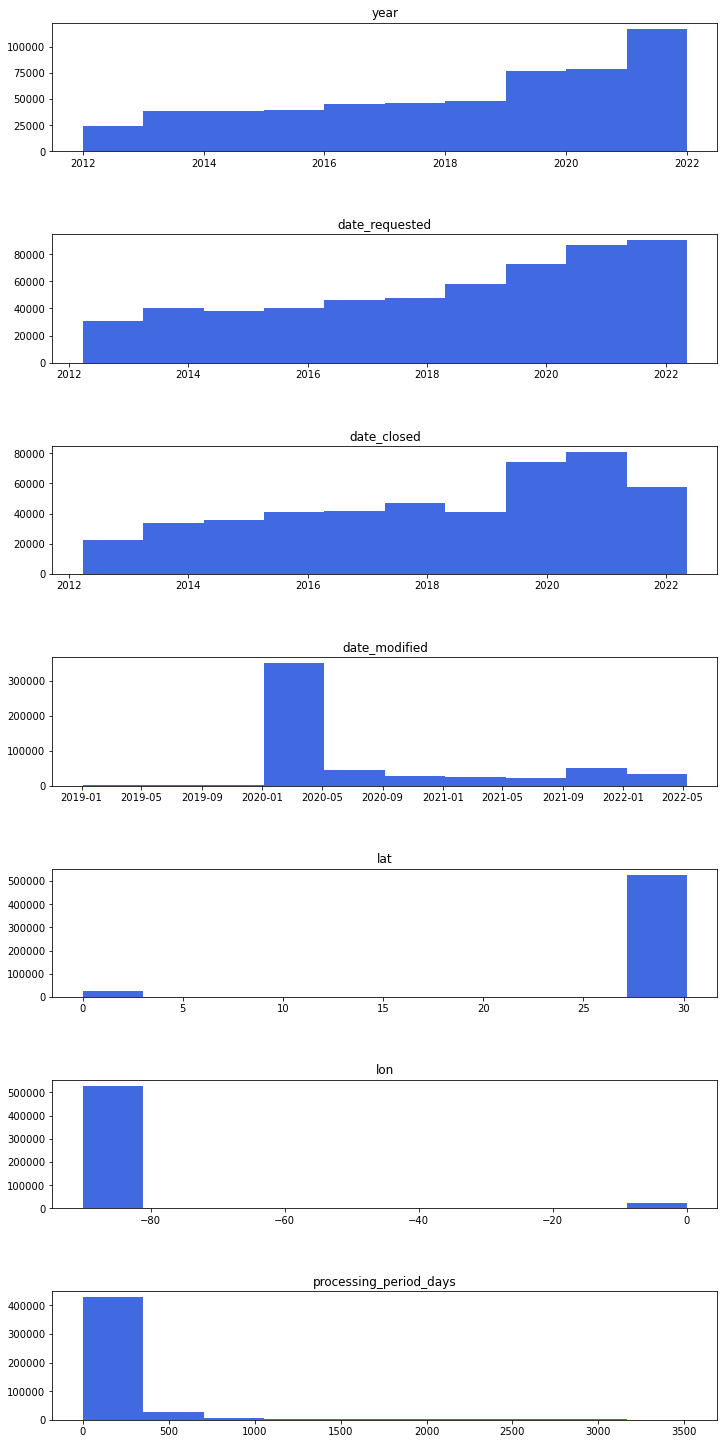

In [45]:
# Check the distributions

# Setting the plots layout
plt.subplots(7,1, figsize=(10,20))

# Plotting
for i, column in enumerate(continuous.columns, 1):
    plt.subplot(7,1,i)
    plt.hist(continuous[column], color = 'royalblue')
    plt.title(column)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

**Observations:**<br>
- `Year` - The number of requests are steadily growing. The total number of requests grew since 2012 by approximately 400%.
- `date_requested` - Follows the same trend as `year` - shows steady growth.
- `date_closed` - The line of growth of the total number of closed cases is not as smooth as the line of growth of the requested cases, which means the City and responsible Agencies have peak and downtimes. I observe a pronounced dip over 2019 - early 2020, which could be explained by staff shortage due to the Coronavirus pandemic. Additionally we know that this was the time when the NOLA 311 call centre switched from one operating model to another, therefore, an adjustment period is expected. 
- `date_modified` - An interesting spike falls on the first half of 2020. This spike is aligned with another spike around the same time in `date_closed`. I would assume that is when a lot of pending cases were closed after prolonged waiting period since 2019. We could investigate this further, but that does not directly impact our business problem.
- `lat` and `lon` - These variables are not very informative in this case.
- `processing_period_days` - This variable is not normally distributed and it looks like it may have a number of outliers.

In [7]:
df['processing_period_days'].describe().to_frame()

,processing_period_days
count,504261.000000
mean,148.252137
std,379.768387
min,0.000000
25%,4.000000
50%,20.000000
75%,109.000000
max,3515.000000


**Observations:** 
- On average it takes 148 days to close a request
- The longest request took 3515 days to process
- The shortest request was closed in 0 days

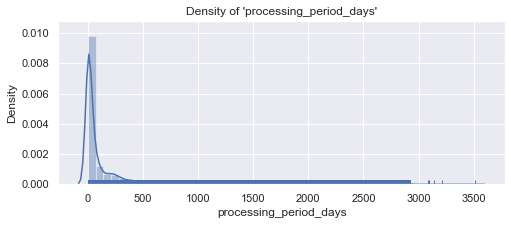

In [272]:
fig, ax = plt.subplots(figsize=(8,3))
sns.distplot(df.processing_period_days, rug=True, ax=ax).set(title = "Density of 'processing_period_days'")
fig.savefig("distplot_processing_period_days.png", dpi=300)

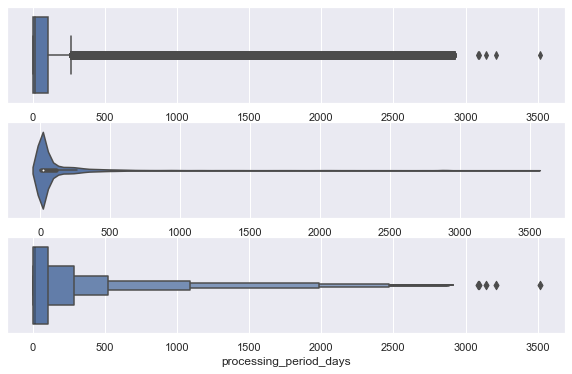

In [251]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 6))
sns.boxplot(df.processing_period_days, ax=axs[0])
sns.violinplot(df.processing_period_days, ax=axs[1])
sns.boxenplot(df.processing_period_days, ax=axs[2])
plt.title = ('plots_processing_period_days')
fig.savefig("plots_processing_period_days.png", dpi=300)

**Observation:**<br>
Data distribution is skewed to the left. The median appears to be much closer to zero compared to the rest of the data, and as we can see from the table above, standard deviation is 380 days. I observe a remarkable number of outliers that will have to be taken into consideration when building models.

In [105]:
# Another way to evaluate the outliers is to take a look at the total number of pending and closed cases per year
pending_cases_distribution = df.groupby(['year', 'status']).size().to_frame('size')
pending_cases_distribution

size
year status        
2012 Closed   23811
     Pending     12
2013 Closed   38182
     Pending      3
2014 Closed   38159
2015 Closed   39128
2016 Closed   44906
     Pending      9
2017 Closed   46340
     Pending     31
2018 Closed   48348
     Pending     26
2019 Closed   62686
     Pending  13884
2020 Closed   62190
     Pending  16378
2021 Closed   65634
     Pending  25149
2022 Closed    6429
     Pending  19947

I see a few pending cases that will eventually turn into ouliers in the 2012 - 2018 period, and from 2019 to Present, there are a lot of pending cases. This means that in the future, we will have even more outliers to deal with. In certain models these outliers may have to be separated from the dataset and analyzed separately.

In [47]:
# Count occurence of each period in days

period_table = df['processing_period_days'].value_counts().to_frame().reset_index()
period_table['days'] = period_table['index']
period_table.drop(columns='index', inplace=True)
period_table

,processing_period_days,days
0,51535,0.0
1,21910,1.0
2,15240,7.0
3,15182,2.0
4,14582,3.0
...,...,...
2570,1,1051.0
2571,1,1674.0
2572,1,1479.0
2573,1,1660.0


In [48]:
# Show the ouliers in descending order by number of days in each processing period

period_table.sort_values(by='days', ascending=False)

,processing_period_days,days
2542,1,3515.0
2473,1,3208.0
2458,1,3143.0
2536,1,3095.0
2454,1,3086.0
...,...,...
5,13514,4.0
4,14582,3.0
3,15182,2.0
1,21910,1.0


In [49]:
# How much of the data is below a specific percentile
# For example 90% of the data has value less than 357
np.percentile(a=df['processing_period_days'].dropna(), q=range(90, 100))

array([ 357.  ,  395.  ,  437.  ,  489.  ,  556.  ,  638.  ,  860.  ,
       1203.  , 1760.76, 2336.  ])

<AxesSubplot:title={'center':'Number of service requests over Processing periods grouped by number of days in each period'}, xlabel='processing_period_days', ylabel='Number of requests'>

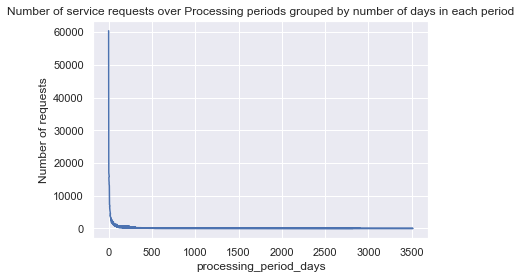

In [274]:
df['processing_period_days'].value_counts().plot(xlabel = 'processing_period_days',
                                                 ylabel = 'Number of requests', 
                                                 title = 'Number of service requests over Processing periods grouped by number of days in each period')

In [51]:
# Show all data expect for the the top 10 percentile
period_table[period_table['processing_period_days'] > 366] # rounded 357 to 366 to make it a full year

,processing_period_days,days
0,51535,0.0
1,21910,1.0
2,15240,7.0
3,15182,2.0
4,14582,3.0
...,...,...
172,370,214.0
173,369,251.0
174,369,201.0
175,369,228.0


---

**<center>End of Exploratory Data Analysis</center>**

# Data Wrangling

## Create New Variables

### `month`

In [238]:
# Create a variable 'month' - month when a request was created
# It will be useful in determining seasonality

df['month'] = df['date_requested'].dt.month

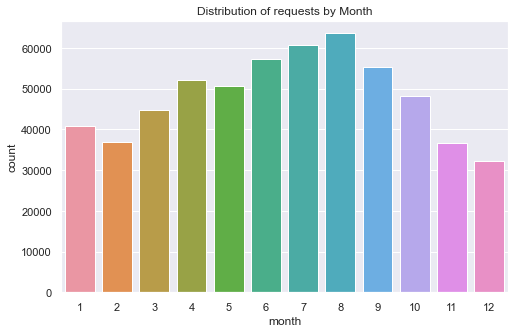

In [279]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'month', data = df).set(title = 'Distribution of requests by Month')
fig.savefig("Distribution of requests by Month", dpi=300)

**Observation:**<br>
As I mentioned in Part One of the project, it would be expected that August would be the busiest month, which is when people are back from holidays and are getting ready for a new school year. 

In [242]:
df.columns

Index(['id', 'year', 'dist', 'agency', 'type', 'date_requested', 'status',
       'date_closed', 'tags', 'date_modified', 'reason', 'address', 'lat',
       'lon', 'processing_period_days', 'month'],
      dtype='object')

### `weekday`

In [261]:
# Create a variable 'weekday' - day of the week when a request was created
# It will be useful in determining seasonality

df['weekday'] = df['date_requested'].dt.weekday

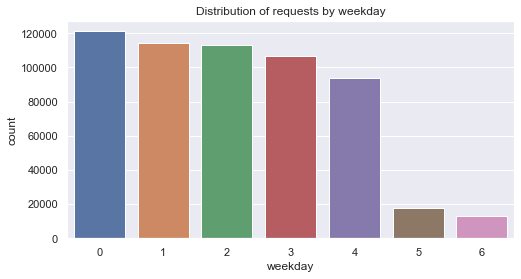

In [280]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'weekday', data = df).set(title = 'Distribution of requests by weekday')
fig.savefig("Distribution of requests by weekday", dpi=300)

**Observation:**
The amount of requests is significantly lower over the weekend compared to the workdays.

In [65]:
# Check

df.sample()

,id,year,dist,agency,type,date_requested,status,date_closed,tags,date_modified,reason,address,lat,lon,processing_period_days,month,weekday
145536,2020-725867,2020,B,Department of Public Works,Traffic Signals/Signs/Striping/Streetlights,2020-10-30,Closed,2020-11-06,unknown,2020-11-06,Street Light Outage/Malfunction,921 Lafayette St,29.949113,-90.074077,7.0,10,4


In this part I will transform selected columns into numeric values. I will keep some of their non-numeric equivalents for future models that work with classes.

> **Create a working dataframe copy for dummies**

In [66]:
df.duplicated().sum()

0

In [67]:
# Create a working copy of the dataframe, dfn stands for 'dataframe numeric'

dummies = df.copy()

## Wrangle non-categorical values

In [68]:
# Check the remaining non-categorical columns

dummies.select_dtypes(exclude = 'object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551252 entries, 0 to 579703
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   year                    551252 non-null  int64         
 1   date_requested          551252 non-null  datetime64[ns]
 2   date_closed             475813 non-null  datetime64[ns]
 3   date_modified           551252 non-null  datetime64[ns]
 4   lat                     551252 non-null  float64       
 5   lon                     551252 non-null  float64       
 6   processing_period_days  475813 non-null  float64       
 7   month                   551252 non-null  int64         
 8   weekday                 551252 non-null  int64         
dtypes: datetime64[ns](3), float64(3), int64(3)
memory usage: 58.2 MB


I need to treat the following columns as categories, not continued values. Therefore, I will transform them into dummies:`year`, `month`, `weekday`

In [69]:
# get dummies for 'year', 'month', 'weekday'
dummies = pd.get_dummies(dummies, columns = ['year'], prefix = 'year', prefix_sep='_', drop_first = True)
dummies = pd.get_dummies(dummies, columns = ['month'], prefix = 'month', prefix_sep='_', drop_first = True)
dummies = pd.get_dummies(dummies, columns = ['weekday'], prefix = 'weekday', prefix_sep='_', drop_first = True)

I have pulled all the information I needed for date fields, and now I will remove the date variables after the rest of the dummies are ready.

## Wrangle categorical values

In [70]:
dummies.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551252 entries, 0 to 579703
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       551252 non-null  object
 1   dist     551252 non-null  object
 2   agency   551252 non-null  object
 3   type     551252 non-null  object
 4   status   551252 non-null  object
 5   tags     551252 non-null  object
 6   reason   551252 non-null  object
 7   address  551252 non-null  object
dtypes: object(8)
memory usage: 54.0+ MB


In [71]:
# MAKE THIS 4 LOOP

dummies = pd.get_dummies(dummies, columns = ['dist'], prefix = 'dist', prefix_sep='_', drop_first = True)
dummies = pd.get_dummies(dummies, columns = ['agency'], prefix = 'agency', prefix_sep='_', drop_first = True)
dummies = pd.get_dummies(dummies, columns = ['type'], prefix = 'type', prefix_sep='_', drop_first = True)
dummies = pd.get_dummies(dummies, columns = ['tags'], prefix = 'tags', prefix_sep='_', drop_first = True)

In [72]:
# Convert 'status' to a binary column

dummies['status'] = dummies['status'].apply(lambda x: 1 if x == 'Closed' else 0)

# Rename 'status' for easier interpretation, so that we know what value '1' in this columns stands for Closed, '0' - Pending

dummies.rename(columns={'status' : 'case_closed'}, inplace = True)

Remove the following columns: 
- `id`: This column has no value in terms of the future analysis
- `issue_description_old` and `reason`: These columns are text data, that will have to be processed outside dummies format
- `address` - With 255633 unique addresses, my dataframe will become cumbersome. I will be using `dist` to determine part of the city where the request came from.

Before deleting columns from this dataframe, I will create a back-up to have a dataframe with dummies and the rest of the columns in case I need it later on.

In [73]:
dummies_mixed = dummies.copy()

In [74]:
dummies.duplicated().sum()

0

In [75]:
dummies.head()

,id,date_requested,case_closed,date_closed,date_modified,reason,address,lat,lon,processing_period_days,...,type_Trash/Recycling,type_unknown,tags_Inspected,tags_Pending,tags_Referred,tags_Referred to Code Enforcement,tags_Resolved,tags_Reviewed,tags_other,tags_unknown
0,2019-631621,2019-11-06,0,NaT,2019-11-06,unknown,unknown,0.000000,0.000000,NaN,...,0,1,0,0,0,0,0,0,0,1
1,2021-830021,2021-10-05,0,NaT,2021-10-05,COVID-19 Business Non-Compliance,823 Fulton St,29.943975,-90.065412,NaN,...,0,0,0,1,0,0,0,0,0,0
2,2021-821555,2021-09-15,1,2021-12-15,2021-12-15,Missed Trash Pick-Up,1672 Rousselin Dr,29.979937,-90.073291,91.0,...,1,0,0,0,0,0,1,0,0,0
3,2021-821553,2021-09-15,1,2021-12-15,2021-12-15,Missed Trash Pick-Up,1334 Bartholomew St,29.968404,-90.034680,91.0,...,1,0,0,0,0,0,1,0,0,0
4,2021-821552,2021-09-15,1,2021-12-15,2021-12-15,Missed Trash Pick-Up,1564 N Prieur St,29.974061,-90.068478,91.0,...,1,0,0,0,0,0,1,0,0,0


In [76]:
dummies.duplicated().sum()

0

In [78]:
dummies.drop(columns = ['date_requested',
                        'date_closed',
                        'date_modified',
                        'id', 
                        'reason', 
                        'address'
                       ], inplace = True)

In [79]:
len(dummies.columns)

74

In [80]:
dummies.columns

Index(['case_closed', 'lat', 'lon', 'processing_period_days', 'year_2013',
       'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'dist_B', 'dist_C',
       'dist_D', 'dist_E', 'dist_unknown', 'agency_Bureau of Treasury',
       'agency_Department of Code Enforcement',
       'agency_Department of Parks & Parkway',
       'agency_Department of Public Works', 'agency_Department of Sanitation',
       'agency_Emergency Medical Services',
       'agency_Executive Office of the Mayor',
       'agency_Ground Transportation Bureau', 'agency_Health Department',
       'agency_Mosquito, Termite & Rodent Control Board',
       'agency_Office of Police Secondary Employment',
       'agency_Safety and P

In [81]:
# Check if any categorical columns have left

dummies.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551252 entries, 0 to 579703
Empty DataFrame

## Show end result of dummies

In [82]:
# Show data metrics

print("The new dataset contains:")
print(f"{dummies.shape[0]} rows and {dummies.shape[1]} columns.")
print(f"{dummies.isna().sum().sum()} null values, that is {round(dummies.isna().sum().sum()/(dummies.isna().sum().sum()+dummies.notnull().sum().sum())*100, )}% of all dataset cels (not rows)")
print(f"{dummies.duplicated().sum()} duplicated rows")

The new dataset contains:
551252 rows and 74 columns.
75439 null values, that is 0% of all dataset cels (not rows)
28330 duplicated rows


In [275]:
print(f"Notice that after we dropped the remaining categorical variables, we have \
{dummies.duplicated().sum()} duplicate values in the dataset. That is \
{round(dummies.duplicated().sum()/dummies.shape[0]*100,2)}% of the records that now look \
identical without the additional information that was stored in the categorical columns. \
To not confuse the future models, I am going to remove these duplicates.")

Notice that after we dropped the remaining categorical variables, we have 0 duplicate values in the dataset. That is 0.0% of the records that now look identical without the additional information that was stored in the categorical columns. To not confuse the future models, I am going to remove these duplicates.


In [84]:
# Remove the newly created duplicates

dummies.drop_duplicates(inplace = True)

In [85]:
# Check 

dummies.duplicated().sum()

0

In [86]:
print(f"Final note: the new dataframe - dummies holds \
{round(dummies.shape[0]/backup.shape[0]*100)}% of the initial data set, \
or {round(dummies.shape[0]/df.shape[0]*100)}% of the df data set, that contains categories.")

Final note: the new dataframe - dummies holds 90% of the initial data set, or 95% of the df data set, that contains categories.


In [87]:
# Show % of missing values and where they are

na_table = dummies.isna().mean().mul(100).round(2)
na_table[na_table > 0]

processing_period_days    13.16
dtype: float64

In [95]:
dummies.dtypes.value_counts()

uint8      70
float64     3
int64       1
dtype: int64

## Show end result of df

In [88]:
# Show data metrics

print("The new dataset contains:")
print(f"{df.shape[0]} rows and {df.shape[1]} columns.")
print(f"{df.isna().sum().sum()} null values, that is {round(df.isna().sum().sum()/(df.isna().sum().sum()+df.notnull().sum().sum())*100, )}% of all dataset cels (not rows)")
print(f"{df.duplicated().sum()} duplicated rows")

The new dataset contains:
551252 rows and 17 columns.
150878 null values, that is 2% of all dataset cels (not rows)
0 duplicated rows


In [89]:
# Show % of missing values and where they are

na_table = df.isna().mean().mul(100).round(2)
na_table[na_table > 0]

date_closed               13.69
processing_period_days    13.69
dtype: float64

---

**<center>End of Data Wrangling</center>**

In [90]:
# Save df to a csv
df.to_csv(r'C:\Users\nadia\OneDrive\Desktop\end_of_part_two.csv', index=False)

In [91]:
# Save dummies to a csv
dummies.to_csv(r'C:\Users\nadia\OneDrive\Desktop\end_of_part_two_dummies.csv', index=False)